In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
pd.set_option('max_columns', 50)
%matplotlib inline

In [2]:
%cd ~/Projects/hackathon/IceEdge/dataset/

/home/xypnox/Projects/hackathon/IceEdge/dataset


In [3]:
!head -n 5 merged.csv

In [4]:
from_csv = pd.read_csv('merged.csv')
from_csv.head()


,id,cnt_airlines,cnt_entertainment,cnt_auto_rentals,cnt_vehicles,cnt_business_serv,cnt_clothing_stores,cnt_contracted_serv,cnt_direct_marketing,cnt_govt_serv,cnt_hotel,cnt_misc,cnt_personal_serv_prov,cnt_repair_serv,cnt_retail_stores,cnt_service_prov,cnt_transport,cnt_utilities,cnt_wholesale_distributor,tot_tran_cnt,amt_airlines,amt_entertainment,amt_auto_rentals,amt_vehicles,amt_business_serv,amt_clothing_stores,amt_contracted_serv,amt_direct_marketing,amt_govt_serv,amt_hotel,amt_misc,amt_personal_serv_prov,amt_repair_serv,amt_retail_stores,amt_service_prov,amt_transport,amt_utilities,amt_wholesale_distributor,tot_tran_amt,payment,year,month
0,1,3,1,3,1,3,1,0,1,1,1,3,1,3,3,3,1,1,3,33,9.0,3,4,4,1,8,0,1,5,14,23,8,1,14,4,5,5,1,110.0,55.00,2018,12
1,2,2,3,1,2,2,1,2,2,3,2,1,2,2,1,1,2,1,3,33,511.0,198,249,224,70,479,13,70,313,811,1335,460,32,792,224,300,275,32,6388.0,3194.00,2018,12
2,3,1,1,2,3,3,1,1,1,1,1,2,1,3,2,1,1,2,1,28,30.0,12,15,13,4,28,1,4,18,48,78,27,2,46,13,18,16,2,375.0,375.00,2018,12
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.00,2018,12
4,5,2,2,2,2,3,1,3,2,1,1,3,1,1,2,2,1,3,1,33,2324.0,901,1133,1017,320,2179,58,320,1423,3689,6071,2091,145,3602,1017,1365,1249,145,29049.0,1452.45,2018,12


In [5]:
from_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767442 entries, 0 to 767441
Data columns (total 42 columns):
id                           767442 non-null int64
cnt_airlines                 767442 non-null int64
cnt_entertainment            767442 non-null int64
cnt_auto_rentals             767442 non-null int64
cnt_vehicles                 767442 non-null int64
cnt_business_serv            767442 non-null int64
cnt_clothing_stores          767442 non-null int64
cnt_contracted_serv          767442 non-null int64
cnt_direct_marketing         767442 non-null int64
cnt_govt_serv                767442 non-null int64
cnt_hotel                    767442 non-null int64
cnt_misc                     767442 non-null int64
cnt_personal_serv_prov       767442 non-null int64
cnt_repair_serv              767442 non-null int64
cnt_retail_stores            767442 non-null int64
cnt_service_prov             767442 non-null int64
cnt_transport                767442 non-null int64
cnt_utilities         

In [6]:
from_csv.describe()

,id,cnt_airlines,cnt_entertainment,cnt_auto_rentals,cnt_vehicles,cnt_business_serv,cnt_clothing_stores,cnt_contracted_serv,cnt_direct_marketing,cnt_govt_serv,cnt_hotel,cnt_misc,cnt_personal_serv_prov,cnt_repair_serv,cnt_retail_stores,cnt_service_prov,cnt_transport,cnt_utilities,cnt_wholesale_distributor,tot_tran_cnt,amt_airlines,amt_entertainment,amt_auto_rentals,amt_vehicles,amt_business_serv,amt_clothing_stores,amt_contracted_serv,amt_direct_marketing,amt_govt_serv,amt_hotel,amt_misc,amt_personal_serv_prov,amt_repair_serv,amt_retail_stores,amt_service_prov,amt_transport,amt_utilities,amt_wholesale_distributor,tot_tran_amt,payment,year,month
count,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,7.674420e+05,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,767442.000000,7.674420e+05,7.674420e+05,767442.000000,767442.000000
mean,20011.136934,1.939498,1.300063,1.940295,1.390181,1.940040,1.150882,1.986867,1.857959,1.215061,1.046780,3.400822,1.140068,1.940007,2.942383,1.940901,1.081304,1.215280,1.939526,31.367917,9.810800e+05,345.664415,434.843746,390.256409,122.715358,836.151322,216.667249,122.715358,546.317352,1415.813738,2329.898666,802.708765,55.844185,1382.372515,390.256409,524.022798,479.435560,55.844185,9.915315e+05,6.917795e+05,2017.499966,6.499313
std,11546.215071,0.870207,0.699561,0.873450,0.759823,0.872866,0.444952,1.846236,0.879689,0.626125,0.381692,1.296870,0.541385,0.873230,1.148317,0.873201,0.454202,0.625952,0.873338,5.316408,4.443163e+07,676.336269,850.874253,763.604181,239.992960,1636.293696,3290.818532,239.992960,1069.045876,2770.789641,4559.803220,1570.842396,109.082401,2705.338029,763.604181,1025.411464,938.142207,109.082401,4.443140e+07,3.503780e+07,0.500000,3.451171
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,2017.000000,1.000000
25%,10018.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,30.000000,4.400000e+01,17.000000,21.000000,19.000000,6.000000,40.000000,1.000000,6.000000,26.000000,68.000000,112.000000,39.000000,3.000000,66.000000,19.000000,25.000000,23.000000,3.000000,5.960000e+02,3.310000e+02,2017.000000,4.000000
50%,20019.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,3.000000,1.000000,2.000000,3.000000,2.000000,1.000000,1.000000,2.000000,32.000000,2.150000e+02,82.000000,103.000000,93.000000,29.000000,199.000000,6.000000,29.000000,130.000000,337.000000,554.000000,191.000000,13.000000,329.000000,93.000000,125.000000,114.000000,13.000000,2.826000e+03,1.612000e+03,2017.000000,7.000000
75%,30007.000000,3.000000,1.000000,3.000000,2.000000,3.000000,1.000000,3.000000,3.000000,1.000000,1.000000,4.000000,1.000000,3.000000,4.000000,3.000000,1.000000,1.000000,3.000000,34.000000,9.330000e+02,356.000000,448.000000,402.000000,127.000000,862.000000,26.000000,127.000000,563.000000,1460.000000,2403.000000,828.000000,58.000000,1425.750000,402.000000,540.000000,494.000000,58.000000,1.197000e+04,7.396000e+03,2018.000000,9.000000
max,40000.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,30.000000,3.000000,3.000000,3.000000,10.000000,3.000000,3.000000,8.000000,3.000000,3.000000,3.000000,3.000000,46.000000,8.814949e+09,1

In [7]:
np.corrcoef(from_csv['cnt_entertainment'].to_numpy(), from_csv['cnt_auto_rentals'].to_numpy())

array([[1.        , 0.12867769],
       [0.12867769, 1.        ]])

In [8]:
# Correlation matrix between count of different sectors taken as a whole
cor_data = {}
cnt_heads = []
for heads in from_csv:
    if re.search("^cnt_", heads):
        cor_data[heads] = []
        cnt_heads.append(heads)
        for heads2 in from_csv:
            if re.search("^cnt_", heads2):
                cor_data[heads].append(np.corrcoef(from_csv[heads].to_numpy(), from_csv[heads2].to_numpy())[0][1])
                #print(heads, heads2)
            
print(len(cor_data))            
print(len(cor_data['cnt_entertainment']))

cor_cnt_df = pd.DataFrame(cor_data, index=cnt_heads)
cor_cnt_df.head()


18
18


,cnt_airlines,cnt_entertainment,cnt_auto_rentals,cnt_vehicles,cnt_business_serv,cnt_clothing_stores,cnt_contracted_serv,cnt_direct_marketing,cnt_govt_serv,cnt_hotel,cnt_misc,cnt_personal_serv_prov,cnt_repair_serv,cnt_retail_stores,cnt_service_prov,cnt_transport,cnt_utilities,cnt_wholesale_distributor
cnt_airlines,1.000000,0.124099,0.146203,0.122825,0.145146,0.159045,-0.201254,0.142909,0.128995,0.166873,0.157206,0.139458,0.143984,0.152908,0.145845,0.150328,0.128722,0.146042
cnt_entertainment,0.124099,1.000000,0.128678,0.456993,0.127056,-0.005573,-0.164869,0.167103,0.479042,0.292312,-0.255345,0.415370,0.127254,-0.316844,0.126687,0.357153,0.481864,0.128487
cnt_auto_rentals,0.146203,0.128678,1.000000,0.126358,0.151372,0.177359,-0.197356,0.143940,0.131845,0.186743,0.179555,0.143713,0.152910,0.174701,0.153754,0.161470,0.132428,0.151595
cnt_vehicles,0.122825,0.456993,0.126358,1.000000,0.124854,-0.045476,-0.162466,0.172825,0.401722,0.253033,-0.271785,0.352305,0.125919,-0.285641,0.124527,0.307140,0.400859,0.125491
cnt_business_serv,0.145146,0.127056,0.151372,0.124854,1.000000,0.175615,-0.199782,0.147616,0.132075,0.186114,0.177364,0.144084,0.149985,0.173626,0.153634,0.163136,0.132526,0.152450


In [9]:
# Correlation matrix between count of different sectors taken as a whole
cor_amt_data = {}
amt_heads = []
for heads in from_csv:
    if re.search("^amt_", heads):
        cor_amt_data[heads] = []
        amt_heads.append(heads)
        for heads2 in from_csv:
            if re.search("^amt_", heads2):
                cor_amt_data[heads].append(np.corrcoef(from_csv[heads].to_numpy(), from_csv[heads2].to_numpy())[1][0])
                #print(heads, heads2)
            
print(len(cor_amt_data))            
print(len(cor_amt_data['amt_entertainment']))

cor_amt_df = pd.DataFrame(cor_amt_data, index=amt_heads)
cor_amt_df.head()


18
18


,amt_airlines,amt_entertainment,amt_auto_rentals,amt_vehicles,amt_business_serv,amt_clothing_stores,amt_contracted_serv,amt_direct_marketing,amt_govt_serv,amt_hotel,amt_misc,amt_personal_serv_prov,amt_repair_serv,amt_retail_stores,amt_service_prov,amt_transport,amt_utilities,amt_wholesale_distributor
amt_airlines,1.000000,-0.011236,-0.011235,-0.011235,-0.011241,-0.011234,-0.001453,-0.011241,-0.011234,-0.011233,-0.011233,-0.011234,-0.011255,-0.011233,-0.011235,-0.011235,-0.011235,-0.011255
amt_entertainment,-0.011236,1.000000,1.000000,1.000000,0.999999,1.000000,-0.016912,0.999999,1.000000,1.000000,1.000000,1.000000,0.999997,1.000000,1.000000,1.000000,1.000000,0.999997
amt_auto_rentals,-0.011235,1.000000,1.000000,1.000000,0.999999,1.000000,-0.016911,0.999999,1.000000,1.000000,1.000000,1.000000,0.999997,1.000000,1.000000,1.000000,1.000000,0.999997
amt_vehicles,-0.011235,1.000000,1.000000,1.000000,0.999999,1.000000,-0.016911,0.999999,1.000000,1.000000,1.000000,1.000000,0.999997,1.000000,1.000000,1.000000,1.000000,0.999997
amt_business_serv,-0.011241,0.999999,0.999999,0.999999,1.000000,0.999999,-0.016927,1.000000,0.999999,0.999999,0.999999,0.999999,0.999996,0.999999,0.999999,0.999999,0.999999,0.999996


In [10]:
%cd ~/Projects/hackathon/IceEdge/training/correlation/
cor_cnt_df.to_csv("correlation_cnt.csv")
cor_amt_df.to_csv("correlation_amt.csv")

/home/xypnox/Projects/hackathon/IceEdge/training/correlation


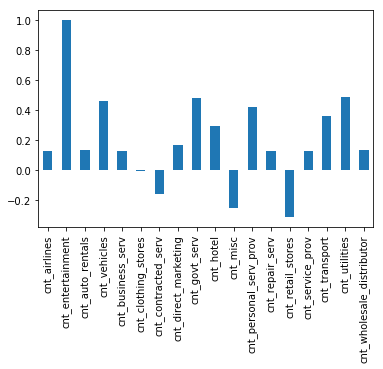

In [23]:
cor_cnt_df['cnt_entertainment'].plot.bar()